# Evolutionary Computation - Assignment 4 Report

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956

## Imports

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib import MatplotlibDeprecationWarning
import warnings

## Problem instance reading and cost scaling

In [2]:
dfTSPA = pd.read_csv('.\\TSPA.csv', sep=';', names=['X', 'Y', 'Cost'])
dfTSPB = pd.read_csv('.\\TSPB.csv', sep=';', names=['X', 'Y', 'Cost'])

min_cost_A = dfTSPA['Cost'].min()
max_cost_A = dfTSPA['Cost'].max()
dfTSPA['Normalized_Cost'] = (dfTSPA['Cost'] - min_cost_A) / (max_cost_A - min_cost_A)

min_cost_B = dfTSPB['Cost'].min()
max_cost_B = dfTSPB['Cost'].max()
dfTSPB['Normalized_Cost'] = (dfTSPB['Cost'] - min_cost_B) / (max_cost_B - min_cost_B)

## Problem description

### Problem

We were to find a cycle that consisted of exactly 50% of the available nodes, where each node had its own cost along with x and y coordinates. The objective function was a sum of node costs and distances (Euclidean) between each traveled node. 

### Solution implementation

We have added an improved method for Local Search created in the previous laboratories in C++.


* **Local Search with Candidate Moves**

    * **Input:**
        - `cycle` : An array of a previously generated cycle
        - `costDistanceInfo` : A symmetric matrix of distances and costs between nodes
        - `nodesToSelect` : Number of nodes to be contained in a cycle

    * **Output:**
        - An array of new `cycle` node IDs

    * **Function:**
        ```python
        FUNCTION initialize(cycle, costDistanceInfo, numOfNearestNeighbours = 10)
            INITIALIZE Neighbourhood array[SIZE of costDistanceInfo][numOfNearestNeighbours]
            FOR EACH node in costDistanceInfo
                FIND 10 neighbours with smallest cost AND distance to node
                ADD neighbours to Neighbourhood array AT [node]
            RETURN Neighbourhood array[nodesToSelect][numOfNearestNeighbours]
        ```

        ```python
        FUNCTION generateCycle(start_pos)
            REPEAT
                possibleMoves = COMBINE generateAllInterMoves(ret, costDistanceInfo) AND generateAllIntraMoves(ret, costDistanceInfo)
                FOR each Neighbourhood move IN possibleMoves DO
                    increase = move.calculateFunctionDelta(moveType, ret) // NEGATIVE VALUE = IMPROVEMENT
                    IF increase < bestIncrease THEN
                        bestIncrease = increase
                        bestMove = move
                IF bestMove IS NOT NULL THEN bestMove.performMove(ret)
                REMOVE ALL Neighbourhood moves in possibleMoves
            UNTIL NO improvement
            RETURN best_cycle_found

## Presenting the results

### Results presented as minimum, average and maximum of objective function

Presented in a table below, each method and each problem instance is shown.

In [3]:
file_paths = ['.\\TSPA_CandidateLocalSearch.csv', '.\\TSPA_NormalLocalSearch.csv', '.\\TSPA_Random.csv',
              '.\\TSPB_CandidateLocalSearch.csv', '.\\TSPB_NormalLocalSearch.csv', '.\\TSPB_Random.csv'] 
methods = ['LS with Candidate Moves', 'Steepest LS on Random', 'Random']
results = []
best_solutions = []
counter = 0
for file_path, method in zip(file_paths, methods * 2):
    df = pd.read_csv(file_path)
    costs = df.iloc[:, -1]
    minimum = costs.min()
    maximum = costs.max()
    mean = round(costs.mean(), 2)
    if counter < len(methods):
        results.append((method, 'TSPA', f"{mean} ({minimum} - {maximum})"))
    else:
        results.append((method, 'TSPB', f"{mean} ({minimum} - {maximum})"))
    if '..' not in file_path:
        min_sol = df.loc[costs.idxmin()][:-1].to_list()
        best_solutions.append(min_sol)
    counter += 1
print(len(best_solutions))
result_df = pd.DataFrame(results, columns=['Method', 'Column', 'Value'])
result_df = result_df.pivot(index='Method', columns='Column', values='Value')
result_df.columns.name = None
result_df

6


,TSPA,TSPB
Method,,
LS with Candidate Moves,74061.4 (71660 - 77771),48454.8 (46127 - 51905)
Random,265574.29 (232959 - 297744),213112.96 (184247 - 233038)
Steepest LS on Random,73852.09 (71654 - 78313),48379.05 (45987 - 51946)


Aditional information regarding the running time of each method (in milliseconds).

In [4]:
methods_for_times = [['Random', 'Steepest LS on Random','LS with Candidate Moves']]
times_files = ['.\\times.csv']

results_times = []
for method_list, time_file in zip(methods_for_times, times_files):
    df_temp = pd.read_csv(time_file, header=None).iloc[:, :-1]
    counter = 0
    for column, method in zip(df_temp.columns, method_list * 2):
        min_value = df_temp[column].min()
        max_value = df_temp[column].max()
        avg_value = df_temp[column].mean()
        if counter < len(method_list):
            results_times.append((method, 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)})"))
        else:
            results_times.append((method, 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)})"))
        counter += 1

times_df = pd.DataFrame(results_times, columns=['Method', 'Column', 'Value'])
times_df = times_df.pivot(index='Method', columns='Column', values='Value')
times_df.columns.name = None  
times_df

,TSPA,TSPB
Method,,
LS with Candidate Moves,51.2072 (41.0786 - 74.8531),44.5927 (37.2666 - 55.7421)
Random,0.0087 (0.0065 - 0.0347),0.008 (0.0066 - 0.0257)
Steepest LS on Random,146.3167 (124.271 - 201.19),142.2417 (124.696 - 169.463)


### Visualization of the best path for each method

Additionally, a list of node indices is presented.

LS with Candidate Moves
TSPA
[106, 178, 49, 14, 144, 62, 148, 94, 63, 79, 80, 133, 151, 162, 59, 118, 51, 176, 137, 23, 186, 89, 183, 143, 0, 117, 93, 68, 46, 115, 139, 41, 193, 159, 199, 69, 108, 18, 22, 146, 34, 48, 54, 30, 177, 10, 4, 112, 184, 160, 181, 42, 43, 116, 65, 131, 149, 123, 127, 194, 135, 70, 154, 180, 158, 53, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 82, 129, 92, 145, 78, 16, 171, 175, 113, 56, 31, 157, 196, 81, 90, 27, 39, 165, 119, 40, 185, 57, 55, 52]
0 3
TSPB
[175, 78, 142, 45, 5, 36, 61, 91, 141, 97, 77, 81, 153, 187, 163, 103, 89, 127, 137, 114, 113, 180, 176, 194, 166, 185, 95, 130, 99, 179, 94, 47, 148, 20, 28, 140, 183, 34, 55, 18, 62, 86, 128, 124, 106, 143, 35, 109, 0, 29, 160, 111, 8, 104, 56, 144, 33, 138, 11, 139, 168, 195, 145, 155, 3, 70, 15, 13, 132, 169, 188, 6, 147, 191, 90, 125, 51, 121, 131, 135, 122, 133, 10, 107, 40, 63, 102, 38, 27, 16, 1, 198, 117, 193, 31, 54, 73, 136, 190, 80]


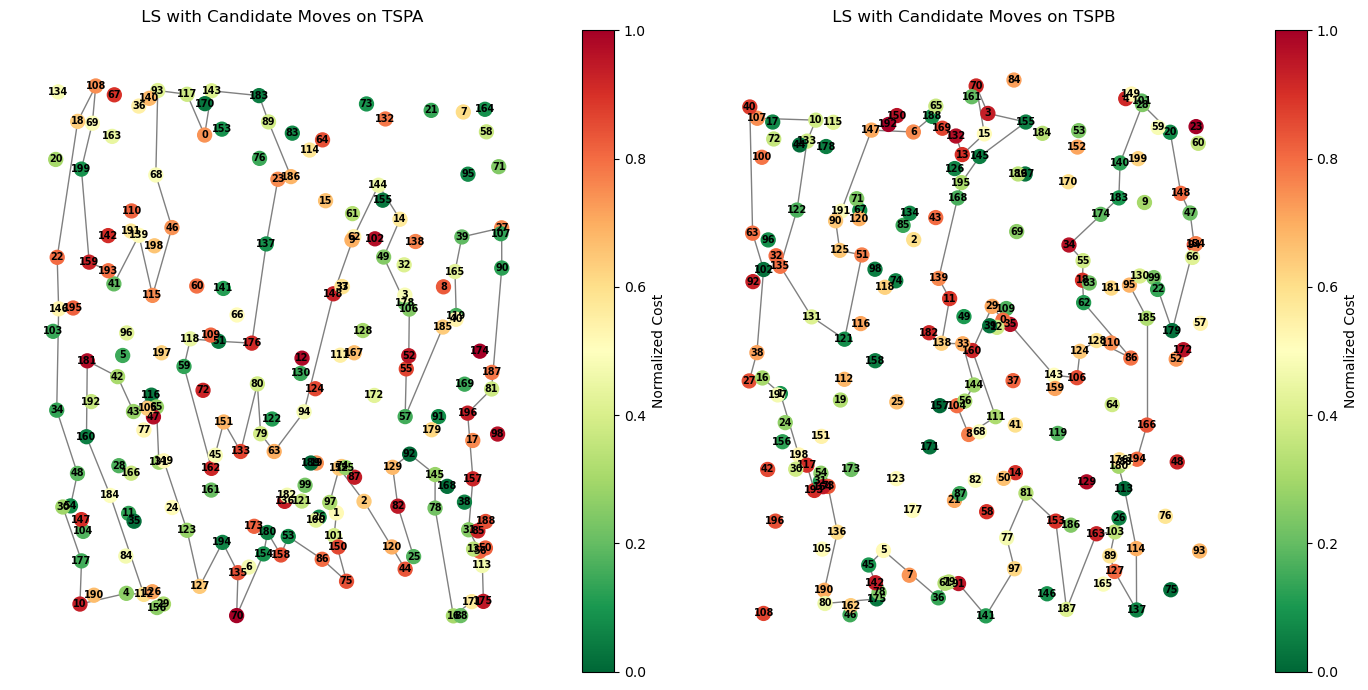

Steepest LS on Random
TSPA
[44, 16, 171, 175, 113, 56, 31, 157, 196, 81, 90, 27, 164, 39, 165, 119, 40, 185, 55, 52, 106, 178, 3, 14, 49, 102, 144, 62, 9, 148, 137, 23, 186, 89, 183, 143, 0, 117, 93, 108, 18, 22, 159, 193, 41, 139, 46, 115, 59, 149, 131, 65, 116, 43, 42, 181, 34, 160, 48, 54, 177, 10, 190, 184, 84, 112, 123, 127, 70, 135, 162, 118, 51, 176, 80, 151, 133, 79, 122, 124, 94, 63, 180, 154, 53, 100, 26, 97, 152, 1, 101, 86, 75, 2, 129, 57, 92, 145, 78, 120]
1 4
TSPB
[136, 190, 80, 162, 175, 78, 142, 45, 5, 177, 104, 8, 82, 87, 21, 61, 36, 141, 97, 77, 81, 111, 144, 33, 160, 29, 0, 109, 35, 143, 124, 106, 153, 187, 163, 165, 127, 89, 103, 113, 176, 194, 166, 86, 185, 95, 130, 99, 179, 94, 47, 148, 60, 20, 28, 149, 4, 199, 140, 183, 174, 55, 18, 62, 34, 170, 152, 184, 155, 3, 70, 15, 145, 132, 169, 188, 6, 13, 195, 168, 139, 11, 138, 182, 25, 121, 51, 90, 122, 133, 107, 40, 63, 135, 1, 117, 193, 31, 54, 73]


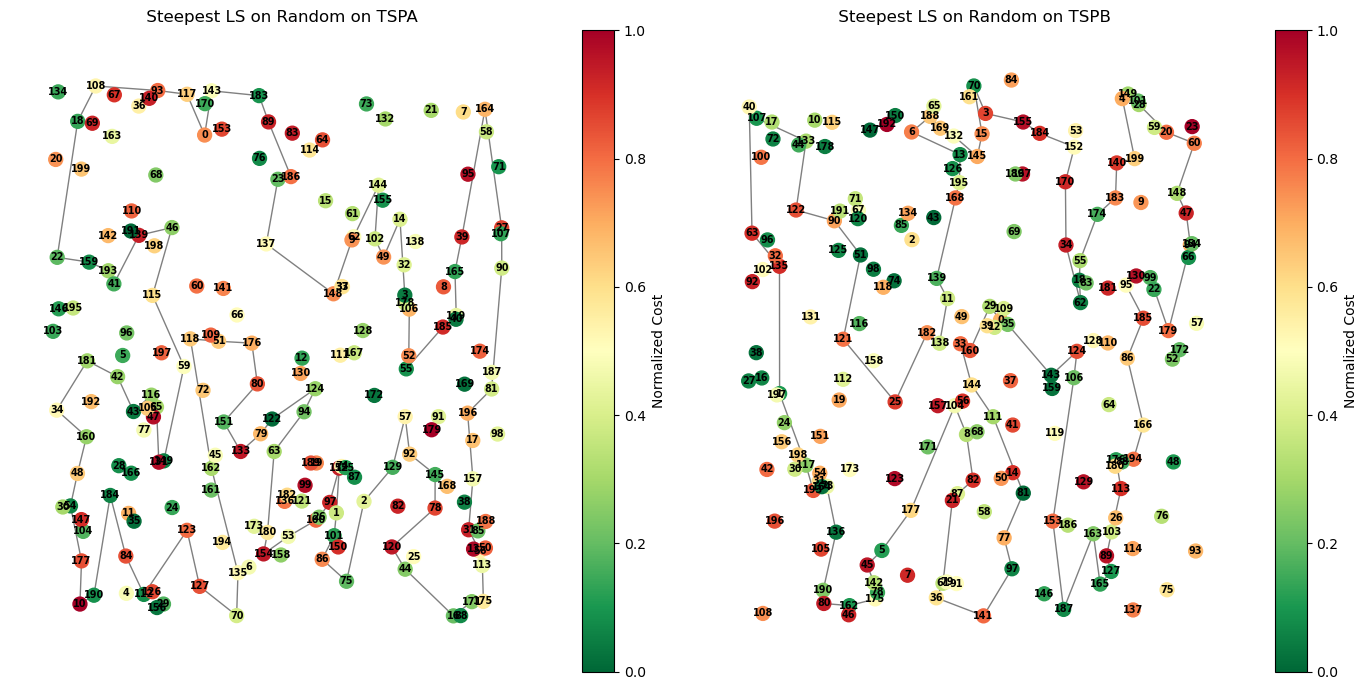

Random
TSPA
[48, 169, 113, 152, 82, 49, 4, 63, 96, 135, 175, 84, 12, 161, 32, 110, 30, 133, 57, 131, 10, 47, 40, 136, 44, 112, 159, 199, 118, 151, 178, 124, 122, 70, 71, 179, 181, 93, 75, 53, 198, 194, 5, 24, 89, 134, 167, 27, 94, 141, 79, 127, 97, 26, 100, 6, 111, 37, 166, 184, 80, 139, 74, 146, 138, 31, 72, 170, 25, 92, 29, 154, 172, 45, 180, 197, 116, 54, 165, 42, 137, 143, 13, 35, 191, 149, 68, 140, 55, 14, 0, 185, 51, 95, 33, 128, 2, 87, 60, 43]
2 5
TSPB
[11, 182, 83, 99, 74, 132, 2, 35, 80, 193, 38, 103, 172, 34, 77, 18, 152, 110, 119, 31, 27, 66, 48, 187, 89, 15, 135, 46, 186, 95, 41, 45, 49, 147, 115, 96, 184, 192, 196, 120, 81, 51, 139, 127, 128, 194, 1, 137, 165, 156, 106, 90, 157, 177, 141, 64, 100, 117, 189, 33, 155, 75, 133, 50, 116, 108, 151, 13, 104, 5, 198, 175, 72, 129, 68, 140, 3, 180, 62, 86, 126, 153, 88, 144, 21, 138, 190, 69, 122, 25, 160, 168, 6, 10, 123, 174, 178, 145, 143, 19]


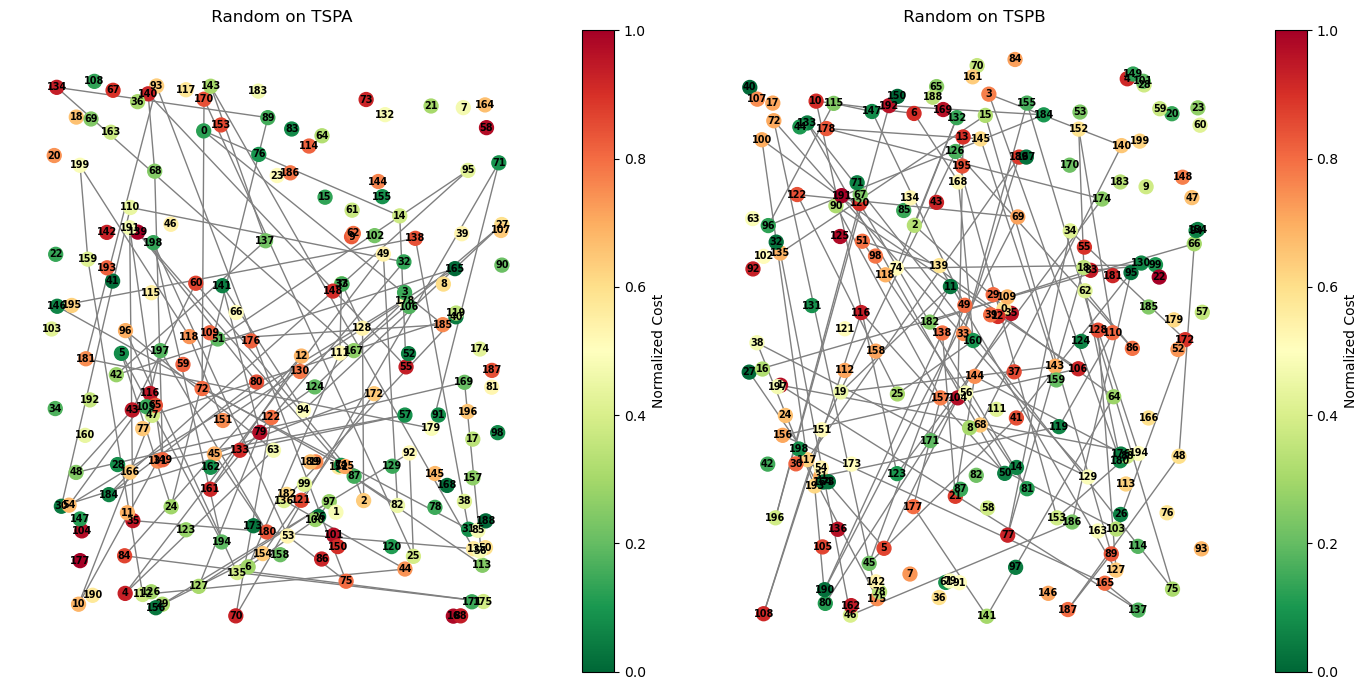

In [5]:
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
cmap = plt.cm.get_cmap('RdYlGn_r')

for count, method in enumerate(methods):
    if count == len(best_solutions) // 2:
        break
    print(method)
    print('TSPA')
    print(best_solutions[count])
    print(count, count + len(best_solutions)//2)
    print('TSPB')
    print(best_solutions[count + len(best_solutions)//2])

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    for count, sol in enumerate([best_solutions[count], best_solutions[count + len(best_solutions)//2]]):
        if count == 0:
            df_temp = dfTSPA
            ax = axs[0]
            instance = 'TSPA'
        else:
            df_temp = dfTSPB
            ax = axs[1]
            instance = 'TSPB'

        G = nx.Graph()
        positions = {}

        for idx in sol:
            G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
            positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])

        for idx in [i for i in range(0,200) if i not in sol]:
            G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
            positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])

        for i in range(len(sol) - 1):
            G.add_edge(sol[i], sol[i + 1])
        G.add_edge(sol[-1], sol[0])


        normalized_costs = df_temp['Normalized_Cost']
        norm = mcolors.Normalize(vmin=normalized_costs.min(), vmax=normalized_costs.max())
        node_colors = [cmap(norm(df_temp.loc[idx, 'Normalized_Cost'])) for idx in range(0, 200)]

        nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=100,
            font_size=7, edge_color='gray', linewidths=1, font_weight='bold', ax=ax)

        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Normalized Cost')

        ax.set_title(f" {method} on {instance}")

    plt.tight_layout()
    plt.show()

## Additional Information

### Solution checker

We have checked all of the best solutions via the solution checker provided.

### Source code link

The source code is available in a repository [here](https://github.com/Mickeyo0o/EvolutionaryComp/tree/main/Lab4) under the Lab4 folder.

## Conclusions

This experiment demonstrates that local search can be significantly enhanced. It's essential to weigh the trade-off between result quality and available computation time.

The method developed shows that, despite yielding slightly worse results in the objective function, it generates effective cycles in just one-third of the time taken by the original Steepest Local Search method.

By utilizing candidate moves, the algorithm effectively narrows the potential move space, allowing for a more focused exploration between most worthy nodes while still maintaining exploration efficiency.

## Authors

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956